# Spacy

In [1]:
import spacy

In [2]:
spacy.prefer_gpu()

True

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
from spacy import displacy
from beautifultable import BeautifulTable

In [5]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')
for token in doc:
    print(token.text, token.pos_, token.pos, token.dep_, token.dep, token.tag_, token.tag)

Apple PROPN 96 nsubj 429 NNP 15794550382381185553
is AUX 87 aux 405 VBZ 13927759927860985106
looking VERB 100 ROOT 8206900633647566924 VBG 1534113631682161808
at ADP 85 prep 443 IN 1292078113972184607
buying VERB 100 pcomp 438 VBG 1534113631682161808
U.K. PROPN 96 compound 7037928807040764755 NNP 15794550382381185553
startup NOUN 92 dobj 416 NN 15308085513773655218
for ADP 85 prep 443 IN 1292078113972184607
$ SYM 99 quantmod 446 $ 11283501755624150392
1 NUM 93 compound 7037928807040764755 CD 8427216679587749980
billion NUM 93 pobj 439 CD 8427216679587749980


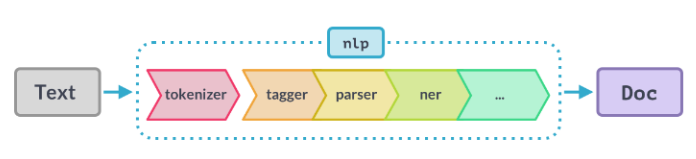

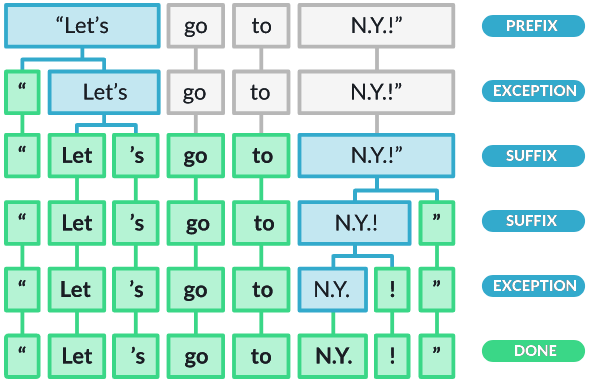

In [6]:
text = '''"Let's go to N.Y.!"'''
doc = nlp(text)
for token in doc:
    print(token.text, token.pos_, token.pos, token.dep_, token.dep)
    
print(f"The String: {doc}")

" PUNCT 97 punct 445
Let VERB 100 ROOT 8206900633647566924
's PRON 95 nsubj 429
go VERB 100 ccomp 408
to ADP 85 prep 443
N.Y. PROPN 96 pobj 439
! PUNCT 97 punct 445
" PUNCT 97 punct 445
The String: "Let's go to N.Y.!"


## Parts of Speech (POS) Tagging and Dependency Parsing

In [7]:
table = BeautifulTable()

In [8]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')
table.columns.header = ['Text', "POS", 'TAG', 'Dep', 'Shape', 'is_alpha', 'is_stop']
for token in doc:
    table.rows.append([token.text, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop])
    
print(doc)
print(table)


Apple is looking at buying U.K. startup for $1 billion
+---------+-------+-----+----------+-------+----------+---------+
|  Text   |  POS  | TAG |   Dep    | Shape | is_alpha | is_stop |
+---------+-------+-----+----------+-------+----------+---------+
|  Apple  | PROPN | NNP |  nsubj   | Xxxxx |    1     |    0    |
+---------+-------+-----+----------+-------+----------+---------+
|   is    |  AUX  | VBZ |   aux    |  xx   |    1     |    1    |
+---------+-------+-----+----------+-------+----------+---------+
| looking | VERB  | VBG |   ROOT   | xxxx  |    1     |    0    |
+---------+-------+-----+----------+-------+----------+---------+
|   at    |  ADP  | IN  |   prep   |  xx   |    1     |    1    |
+---------+-------+-----+----------+-------+----------+---------+
| buying  | VERB  | VBG |  pcomp   | xxxx  |    1     |    0    |
+---------+-------+-----+----------+-------+----------+---------+
|  U.K.   | PROPN | NNP | compound | X.X.  |    0     |    0    |
+---------+-------+--

## Dependency Parsing

In [9]:
table = BeautifulTable()

In [10]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')
table.columns.header = ['Text', "POS", 'TAG', 'Explain Tag', 'Dep', 'Shape', 'is_alpha', 'is_stop']
for token in doc:
    table.rows.append([token.text, token.pos_, token.tag_, spacy.explain(token.tag_), token.dep_, token.shape_, token.is_alpha, token.is_stop])
    
print(doc)
print(table)

Apple is looking at buying U.K. startup for $1 billion
+------+---------+-----+--------------------------+------+-------+------+------+
| Text |   POS   | TAG |       Explain Tag        | Dep  | Shape | is_a | is_s |
|      |         |     |                          |      |       | lpha | top  |
+------+---------+-----+--------------------------+------+-------+------+------+
| Appl |  PROPN  | NNP |  noun, proper singular   | nsub | Xxxxx |  1   |  0   |
|  e   |         |     |                          |  j   |       |      |      |
+------+---------+-----+--------------------------+------+-------+------+------+
|  is  |   AUX   | VBZ | verb, 3rd person singula | aux  |  xx   |  1   |  1   |
|      |         |     |        r present         |      |       |      |      |
+------+---------+-----+--------------------------+------+-------+------+------+
| look |  VERB   | VBG | verb, gerund or present  | ROOT | xxxx  |  1   |  0   |
| ing  |         |     |        participle        |   

In [11]:
table = BeautifulTable()
doc = nlp('Replaced both carbonator float switch and pressure relief value.')
table.columns.header = ['Text', "POS", 'TAG', 'Explain Tag', 'Dep', 'Shape', 'is_alpha', 'is_stop']
for token in doc:
    table.rows.append([token.text, token.pos_, token.tag_, spacy.explain(token.tag_), token.dep_, token.shape_, token.is_alpha, token.is_stop])
    
print(doc)
print(table)

Replaced both carbonator float switch and pressure relief value.
+--------+-------+-----+------------------------+-------+-------+-------+------+
|  Text  |  POS  | TAG |      Explain Tag       |  Dep  | Shape | is_al | is_s |
|        |       |     |                        |       |       |  pha  | top  |
+--------+-------+-----+------------------------+-------+-------+-------+------+
| Replac | VERB  | VBN | verb, past participle  | ROOT  | Xxxxx |   1   |  0   |
|   ed   |       |     |                        |       |       |       |      |
+--------+-------+-----+------------------------+-------+-------+-------+------+
|  both  |  DET  | DT  |       determiner       |  det  | xxxx  |   1   |  1   |
+--------+-------+-----+------------------------+-------+-------+-------+------+
| carbon | NOUN  | NN  | noun, singular or mass | nmod  | xxxx  |   1   |  0   |
|  ator  |       |     |                        |       |       |       |      |
+--------+-------+-----+--------------------

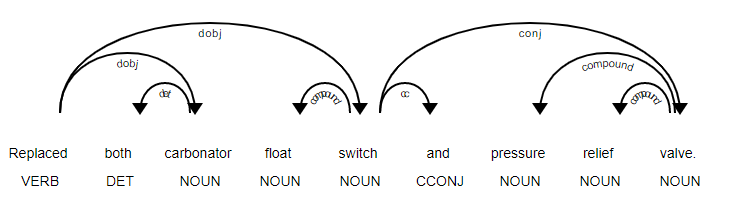

In [12]:
table = BeautifulTable()
doc = nlp('John saw a flashy hat at the store.')
table.columns.header = ['Text', "POS", 'TAG', 'Explain Tag', 'Dep', 'Shape', 'is_alpha', 'is_stop']
for token in doc:
    table.rows.append([token.text, token.pos_, token.tag_, spacy.explain(token.tag_), token.dep_, token.shape_, token.is_alpha, token.is_stop])
    
print(doc)
print(table)

John saw a flashy hat at the store.
+--------+-------+-----+--------------------------+-------+-------+------+-----+
|  Text  |  POS  | TAG |       Explain Tag        |  Dep  | Shape | is_a | is_ |
|        |       |     |                          |       |       | lpha | sto |
|        |       |     |                          |       |       |      |  p  |
+--------+-------+-----+--------------------------+-------+-------+------+-----+
|  John  | PROPN | NNP |  noun, proper singular   | nsubj | Xxxx  |  1   |  0  |
+--------+-------+-----+--------------------------+-------+-------+------+-----+
|  saw   | VERB  | VBD |     verb, past tense     | ROOT  |  xxx  |  1   |  0  |
+--------+-------+-----+--------------------------+-------+-------+------+-----+
|   a    |  DET  | DT  |        determiner        |  det  |   x   |  1   |  1  |
+--------+-------+-----+--------------------------+-------+-------+------+-----+
| flashy |  ADJ  | JJ  | adjective (English), oth | amod  | xxxx  |  1   

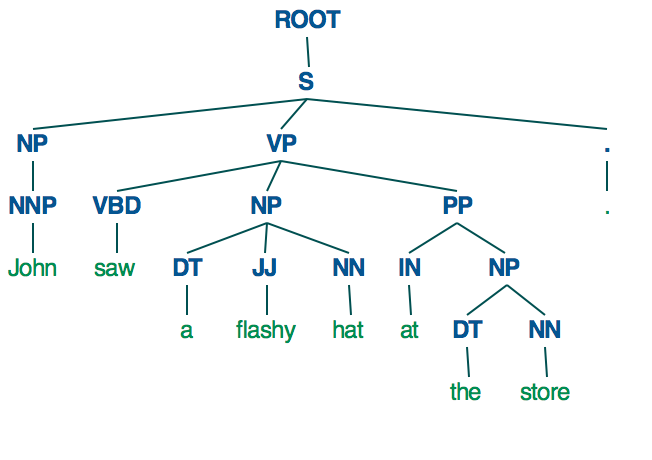

In [13]:
doc = nlp('John saw a flashy hat at the store.')

table = BeautifulTable()
table.columns.header = ['Text', "POS", 'TAG', 'Explain Tag', 'Dep', 'Shape', 'is_alpha', 'is_stop']
for token in doc:
    table.rows.append([token.text, token.pos_, token.tag_, spacy.explain(token.tag_), token.dep_, token.shape_, token.is_alpha, token.is_stop])
    
print(doc)
print(table)

displacy.render(docs=doc, style='dep', jupyter=True)

John saw a flashy hat at the store.
+--------+-------+-----+--------------------------+-------+-------+------+-----+
|  Text  |  POS  | TAG |       Explain Tag        |  Dep  | Shape | is_a | is_ |
|        |       |     |                          |       |       | lpha | sto |
|        |       |     |                          |       |       |      |  p  |
+--------+-------+-----+--------------------------+-------+-------+------+-----+
|  John  | PROPN | NNP |  noun, proper singular   | nsubj | Xxxx  |  1   |  0  |
+--------+-------+-----+--------------------------+-------+-------+------+-----+
|  saw   | VERB  | VBD |     verb, past tense     | ROOT  |  xxx  |  1   |  0  |
+--------+-------+-----+--------------------------+-------+-------+------+-----+
|   a    |  DET  | DT  |        determiner        |  det  |   x   |  1   |  1  |
+--------+-------+-----+--------------------------+-------+-------+------+-----+
| flashy |  ADJ  | JJ  | adjective (English), oth | amod  | xxxx  |  1   

In [14]:
doc = nlp('Bell, based in Los Angeles, makes and distributes electronic, computer and building products.')

table = BeautifulTable()
table.columns.header = ['Text', "POS", 'TAG', 'Explain Tag', 'Dep', 'Shape', 'is_alpha', 'is_stop']
for token in doc:
    table.rows.append([token.text, token.pos_, token.tag_, spacy.explain(token.tag_), token.dep_, token.shape_, token.is_alpha, token.is_stop])
    
print(doc)
print(table)

displacy.render(docs=doc, style='dep', jupyter=True)

Bell, based in Los Angeles, makes and distributes electronic, computer and building products.
+-------+-------+-----+----------------------------+------+-------+------+-----+
| Text  |  POS  | TAG |        Explain Tag         | Dep  | Shape | is_a | is_ |
|       |       |     |                            |      |       | lpha | sto |
|       |       |     |                            |      |       |      |  p  |
+-------+-------+-----+----------------------------+------+-------+------+-----+
| Bell  | PROPN | NNP |   noun, proper singular    | nsub | Xxxx  |  1   |  0  |
|       |       |     |                            |  j   |       |      |     |
+-------+-------+-----+----------------------------+------+-------+------+-----+
|   ,   | PUNCT |  ,  |  punctuation mark, comma   | punc |   ,   |  0   |  0  |
|       |       |     |                            |  t   |       |      |     |
+-------+-------+-----+----------------------------+------+-------+------+-----+
| based | VERB 

In [15]:
doc = nlp('Bell, based in Los Angeles, makes and distributes electronic, computer and building products.')

table = BeautifulTable()
table.columns.header = ['Text', "POS", 'TAG', 'Explain Tag', 'Dep', 'Shape', 'is_alpha', 'is_stop']
for token in doc:
    table.rows.append([token.text, token.pos_, token.tag_, spacy.explain(token.tag_), token.dep_, token.shape_, token.is_alpha, token.is_stop])
    
print(doc)
print(table)

displacy_options = {
    'compact': False,
    'distance': 70,
    'bg': '#007ACC',
    'color': '#FFFFFF',
    'font': 'Source Sans Pro'
}

displacy.render(docs=doc, style='dep', jupyter=True, options=displacy_options)

Bell, based in Los Angeles, makes and distributes electronic, computer and building products.
+-------+-------+-----+----------------------------+------+-------+------+-----+
| Text  |  POS  | TAG |        Explain Tag         | Dep  | Shape | is_a | is_ |
|       |       |     |                            |      |       | lpha | sto |
|       |       |     |                            |      |       |      |  p  |
+-------+-------+-----+----------------------------+------+-------+------+-----+
| Bell  | PROPN | NNP |   noun, proper singular    | nsub | Xxxx  |  1   |  0  |
|       |       |     |                            |  j   |       |      |     |
+-------+-------+-----+----------------------------+------+-------+------+-----+
|   ,   | PUNCT |  ,  |  punctuation mark, comma   | punc |   ,   |  0   |  0  |
|       |       |     |                            |  t   |       |      |     |
+-------+-------+-----+----------------------------+------+-------+------+-----+
| based | VERB 

### Sentence Boundary Detection

In [16]:
para = '''Tap to Pay on iPhone is set to compete against existing iPhone payment solutions for merchants such as Square. It will let small businesses accept NFC contactless payments through supported iOS apps with an iPhone XS or newer. When checking someone out, the merchant will ask the customer to hold their own iPhone, Apple Watch, digital wallet, or contactless card up to the merchant's iPhone to complete a payment quickly and easily.'''
doc = nlp(para)
doc

Tap to Pay on iPhone is set to compete against existing iPhone payment solutions for merchants such as Square. It will let small businesses accept NFC contactless payments through supported iOS apps with an iPhone XS or newer. When checking someone out, the merchant will ask the customer to hold their own iPhone, Apple Watch, digital wallet, or contactless card up to the merchant's iPhone to complete a payment quickly and easily.

In [17]:
list(doc)

[Tap,
 to,
 Pay,
 on,
 iPhone,
 is,
 set,
 to,
 compete,
 against,
 existing,
 iPhone,
 payment,
 solutions,
 for,
 merchants,
 such,
 as,
 Square,
 .,
 It,
 will,
 let,
 small,
 businesses,
 accept,
 NFC,
 contactless,
 payments,
 through,
 supported,
 iOS,
 apps,
 with,
 an,
 iPhone,
 XS,
 or,
 newer,
 .,
 When,
 checking,
 someone,
 out,
 ,,
 the,
 merchant,
 will,
 ask,
 the,
 customer,
 to,
 hold,
 their,
 own,
 iPhone,
 ,,
 Apple,
 Watch,
 ,,
 digital,
 wallet,
 ,,
 or,
 contactless,
 card,
 up,
 to,
 the,
 merchant,
 's,
 iPhone,
 to,
 complete,
 a,
 payment,
 quickly,
 and,
 easily,
 .]

In [18]:
list(doc.sents)

[Tap to Pay on iPhone is set to compete against existing iPhone payment solutions for merchants such as Square.,
 It will let small businesses accept NFC contactless payments through supported iOS apps with an iPhone XS or newer.,
 When checking someone out, the merchant will ask the customer to hold their own iPhone, Apple Watch, digital wallet, or contactless card up to the merchant's iPhone to complete a payment quickly and easily.]

In [19]:
sentences = doc.sents
for sent in sentences:
    print(sent)

Tap to Pay on iPhone is set to compete against existing iPhone payment solutions for merchants such as Square.
It will let small businesses accept NFC contactless payments through supported iOS apps with an iPhone XS or newer.
When checking someone out, the merchant will ask the customer to hold their own iPhone, Apple Watch, digital wallet, or contactless card up to the merchant's iPhone to complete a payment quickly and easily.


## Stop Words

In [20]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [21]:
doc_para = nlp(para)
sentences = doc_para.sents
for sentence in sentences:
    for token in sentence:
        if token.text not in stopwords:
            print(token, end=" ")

Tap Pay iPhone set compete existing iPhone payment solutions merchants Square . It let small businesses accept NFC contactless payments supported iOS apps iPhone XS newer . When checking , merchant ask customer hold iPhone , Apple Watch , digital wallet , contactless card merchant iPhone complete payment quickly easily . 

In [22]:
doc_para = nlp(para)
sentences = doc_para.sents
for sentence in sentences:
    for token in sentence:
        print(token, end=" ")

Tap to Pay on iPhone is set to compete against existing iPhone payment solutions for merchants such as Square . It will let small businesses accept NFC contactless payments through supported iOS apps with an iPhone XS or newer . When checking someone out , the merchant will ask the customer to hold their own iPhone , Apple Watch , digital wallet , or contactless card up to the merchant 's iPhone to complete a payment quickly and easily . 

## Lemmatization

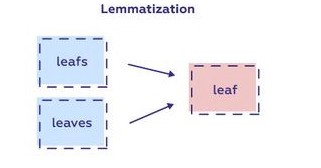

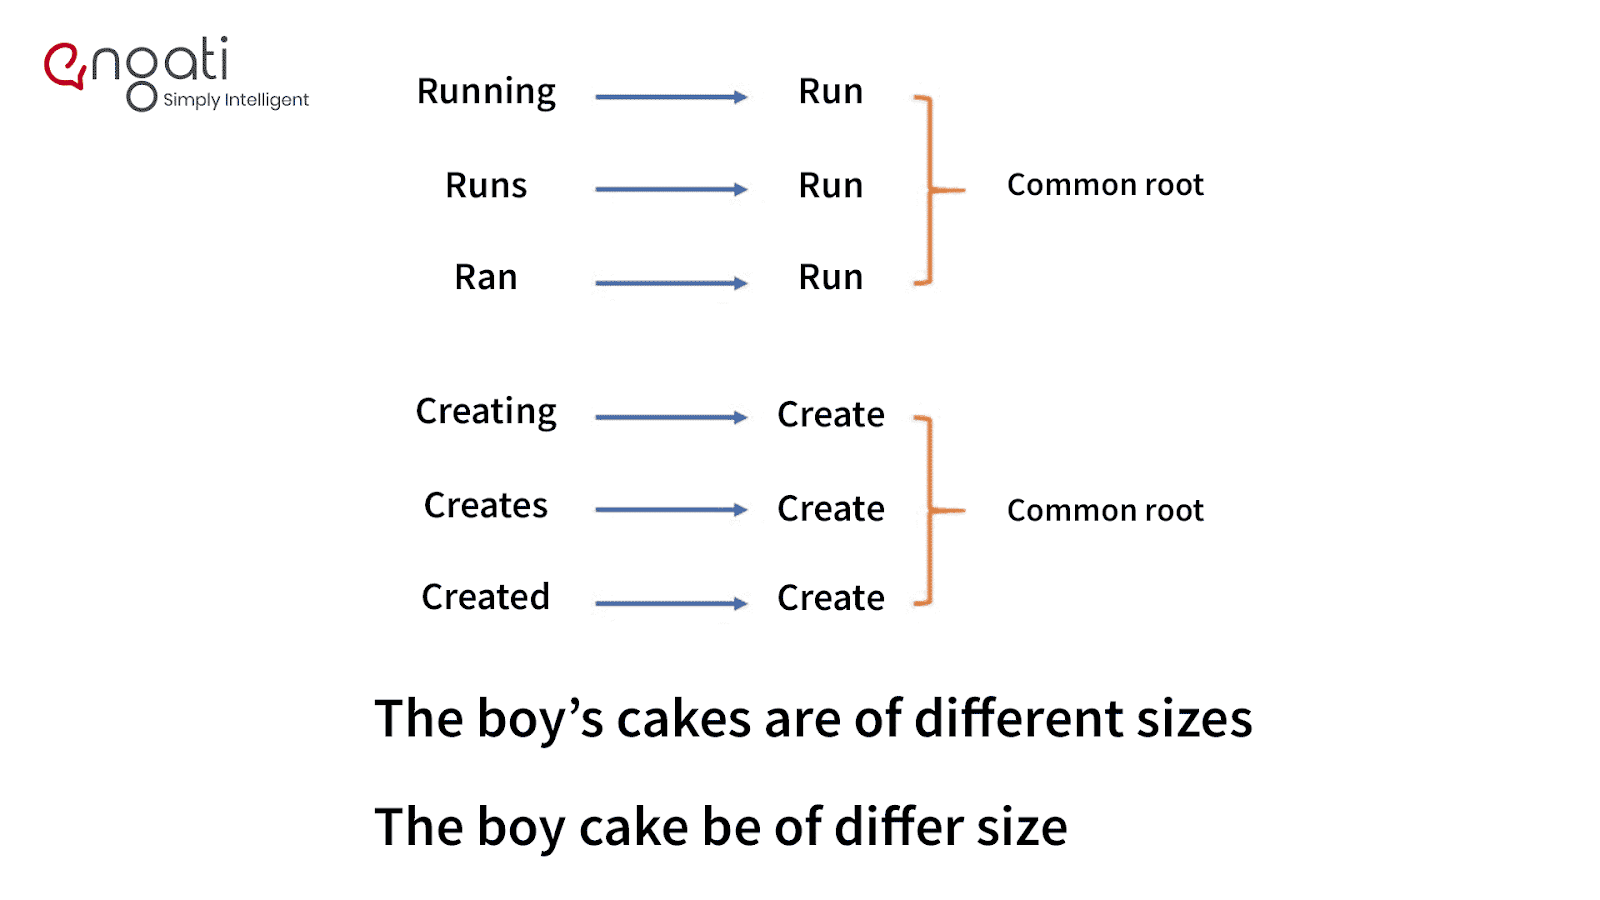

In [23]:
lemma_string = "Study Studying Studies Studied Studier"
doc = nlp(lemma_string)
for token in doc:
    print(token.text, token.lemma_)

Study study
Studying Studying
Studies Studies
Studied studied
Studier Studier


## Stemming

In [24]:
import nltk

In [25]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [26]:
ps = PorterStemmer()

In [27]:
lemma_string = "Study Studying Studies Studied Studier"
ps.stem(lemma_string)

'study studying studies studied studi'

In [28]:
lemma_string_list = str.split(lemma_string)
for word in lemma_string_list:
    print(word, "- Stemmed word is: ", ps.stem(word), "- Lemmatized word is: ", [token.lemma_ for token in nlp(word)][0])

Study - Stemmed word is:  studi - Lemmatized word is:  study
Studying - Stemmed word is:  studi - Lemmatized word is:  study
Studies - Stemmed word is:  studi - Lemmatized word is:  study
Studied - Stemmed word is:  studi - Lemmatized word is:  study
Studier - Stemmed word is:  studier - Lemmatized word is:  studier


## Word Frequency

In [29]:
from collections import Counter

In [30]:
word_freqency = Counter(para.split())
print(word_freqency), type(word_freqency)

Counter({'to': 5, 'iPhone': 4, 'the': 3, 'payment': 2, 'will': 2, 'contactless': 2, 'or': 2, 'Tap': 1, 'Pay': 1, 'on': 1, 'is': 1, 'set': 1, 'compete': 1, 'against': 1, 'existing': 1, 'solutions': 1, 'for': 1, 'merchants': 1, 'such': 1, 'as': 1, 'Square.': 1, 'It': 1, 'let': 1, 'small': 1, 'businesses': 1, 'accept': 1, 'NFC': 1, 'payments': 1, 'through': 1, 'supported': 1, 'iOS': 1, 'apps': 1, 'with': 1, 'an': 1, 'XS': 1, 'newer.': 1, 'When': 1, 'checking': 1, 'someone': 1, 'out,': 1, 'merchant': 1, 'ask': 1, 'customer': 1, 'hold': 1, 'their': 1, 'own': 1, 'iPhone,': 1, 'Apple': 1, 'Watch,': 1, 'digital': 1, 'wallet,': 1, 'card': 1, 'up': 1, "merchant's": 1, 'complete': 1, 'a': 1, 'quickly': 1, 'and': 1, 'easily.': 1})


(None, collections.Counter)

In [31]:
word_freqency.most_common(5)

[('to', 5), ('iPhone', 4), ('the', 3), ('payment', 2), ('will', 2)]

In [32]:
# remove stop words and check for most frequent words
doc = nlp(para)
words = [token.text for token in doc if not token.is_stop and not token.is_punct]
word_freqency = Counter(words)
print(word_freqency.most_common(5))
print(word_freqency)

[('iPhone', 5), ('payment', 2), ('contactless', 2), ('merchant', 2), ('Tap', 1)]
Counter({'iPhone': 5, 'payment': 2, 'contactless': 2, 'merchant': 2, 'Tap': 1, 'Pay': 1, 'set': 1, 'compete': 1, 'existing': 1, 'solutions': 1, 'merchants': 1, 'Square': 1, 'let': 1, 'small': 1, 'businesses': 1, 'accept': 1, 'NFC': 1, 'payments': 1, 'supported': 1, 'iOS': 1, 'apps': 1, 'XS': 1, 'newer': 1, 'checking': 1, 'ask': 1, 'customer': 1, 'hold': 1, 'Apple': 1, 'Watch': 1, 'digital': 1, 'wallet': 1, 'card': 1, 'complete': 1, 'quickly': 1, 'easily': 1})


In [33]:
para

"Tap to Pay on iPhone is set to compete against existing iPhone payment solutions for merchants such as Square. It will let small businesses accept NFC contactless payments through supported iOS apps with an iPhone XS or newer. When checking someone out, the merchant will ask the customer to hold their own iPhone, Apple Watch, digital wallet, or contactless card up to the merchant's iPhone to complete a payment quickly and easily."

##### 

# Rule Based Matching

Compared to using regular expressions on raw text, spaCy’s rule-based matcher engines and components not only let you find the words and phrases you’re looking for – they also give you access to the tokens within the document and their relationships. This means you can easily access and analyze the surrounding tokens, merge spans into single tokens or add entries to the named entities in doc.ents.

- Token-based Matcher

- Phrase Matcher

- Dependency Matcher

- Entity Ruler

- Span Ruler

- Models & Rules

### Token-based Matcher

spaCy features a rule-matching engine, the Matcher, that operates over tokens, similar to regular expressions. The rules can refer to token annotations (e.g. the token text or tag_, and flags like IS_PUNCT). The rule matcher also lets you pass in a custom callback to act on matches – for example, to merge entities and apply custom labels. You can also associate patterns with entity IDs, to allow some basic entity linking or disambiguation. To match large terminology lists, you can use the PhraseMatcher, which accepts Doc objects as match patterns.

In [34]:
from spacy.matcher import Matcher
from spacy.tokens import Span

In [35]:
nlp = spacy.load('en_core_web_sm')

In [36]:
matcher_alice_verb = Matcher(nlp.vocab)
matcher_alice_not_verb = Matcher(nlp.vocab)

In [37]:
# 1. find Alice used as NOUN followed by verb

pattern_alice_verb = [{'LOWER': 'alice', 'POS': 'PROPN'}, {'POS': 'VERB'}]
matcher_alice_verb.add('pattern_alice_verb', [pattern_alice_verb])

In [38]:
# 2. find Alice used as NOUN followed by not verb

pattern_alice_not_verb = [{'LOWER': 'alice', 'POS': 'PROPN'}, {'POS': {'NOT_IN': ['VERB'] } }]
matcher_alice_not_verb.add('pattern_alice_not_verb', [pattern_alice_not_verb])

In [39]:
import requests
response = requests.get('https://www.gutenberg.org/files/11/11-0.txt')
alice_text = response.text
alice_text

'ï»¿The Project Gutenberg eBook of Aliceâ\x80\x99s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Aliceâ\x80\x99s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: January, 1991 [eBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Arthur DiBianca and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICEâ\x80\x99S ADVENTURES IN WONDERLAND ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAliceâ\x80\x9

In [40]:
doc = nlp(alice_text)

In [41]:
matches = matcher_alice_verb(doc)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start: end]
    print(match_id, string_id, start, end, span.text)

2547238978033162687 pattern_alice_verb 472 474 Alice think
2547238978033162687 pattern_alice_verb 567 569 Alice started
2547238978033162687 pattern_alice_verb 690 692 Alice had
2547238978033162687 pattern_alice_verb 1380 1382 Alice began
2547238978033162687 pattern_alice_verb 1854 1856 Alice opened
2547238978033162687 pattern_alice_verb 2311 2313 Alice ventured
2547238978033162687 pattern_alice_verb 3626 3628 Alice felt
2547238978033162687 pattern_alice_verb 3697 3699 Alice took
2547238978033162687 pattern_alice_verb 4953 4955 Alice thought
2547238978033162687 pattern_alice_verb 5063 5065 Alice had
2547238978033162687 pattern_alice_verb 5236 5238 Alice went
2547238978033162687 pattern_alice_verb 5420 5422 Alice went
2547238978033162687 pattern_alice_verb 5629 5631 Alice thought
2547238978033162687 pattern_alice_verb 5972 5974 Alice kept
2547238978033162687 pattern_alice_verb 6806 6808 Alice had
2547238978033162687 pattern_alice_verb 6977 6979 Alice thought
2547238978033162687 pattern_a

In [42]:
matches = matcher_alice_not_verb(doc)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start: end]
    print(match_id, string_id, start, end, span.text)

16406359715410115886 pattern_alice_not_verb 323 325 Alice was
16406359715410115886 pattern_alice_not_verb 384 386 Alice

16406359715410115886 pattern_alice_not_verb 646 648 Alice after
16406359715410115886 pattern_alice_not_verb 884 886 Alice to
16406359715410115886 pattern_alice_not_verb 1010 1012 Alice had
16406359715410115886 pattern_alice_not_verb 1085 1087 Alice had
16406359715410115886 pattern_alice_not_verb 1285 1287 Alice soon
16406359715410115886 pattern_alice_not_verb 1519 1521 Alice was
16406359715410115886 pattern_alice_not_verb 1583 1585 Alice like
16406359715410115886 pattern_alice_not_verb 1682 1684 Alice had
16406359715410115886 pattern_alice_not_verb 1948 1950 Alice,
16406359715410115886 pattern_alice_not_verb 2009 2011 Alice had
16406359715410115886 pattern_alice_not_verb 2095 2097 Alice,
16406359715410115886 pattern_alice_not_verb 2143 2145 Alice was
16406359715410115886 pattern_alice_not_verb 2413 2415 Alice;
16406359715410115886 pattern_alice_not_verb 2509 2511 Ali

16406359715410115886 pattern_alice_not_verb 19224 19226 Alice,
16406359715410115886 pattern_alice_not_verb 19270 19272 Alice gently
16406359715410115886 pattern_alice_not_verb 19347 19349 Alice,
16406359715410115886 pattern_alice_not_verb 19405 19407 Alice.
16406359715410115886 pattern_alice_not_verb 19419 19421 Alice did
16406359715410115886 pattern_alice_not_verb 19498 19500 Alice was
16406359715410115886 pattern_alice_not_verb 19600 19602 Alice,
16406359715410115886 pattern_alice_not_verb 19666 19668 Alice rather
16406359715410115886 pattern_alice_not_verb 19694 19696 Alice was
16406359715410115886 pattern_alice_not_verb 19721 19723 Alice did
16406359715410115886 pattern_alice_not_verb 19830 19832 Alice,
16406359715410115886 pattern_alice_not_verb 19893 19895 Alice.
16406359715410115886 pattern_alice_not_verb 19904 19906 Alice was
16406359715410115886 pattern_alice_not_verb 20006 20008 Alice,
16406359715410115886 pattern_alice_not_verb 20035 20037 Alice could
16406359715410115886 pa

In [43]:
pattern_alice_adj_noun = [{'POS': 'ADJ'}, {'POS': 'NOUN'}]
matcher_alice_adj_noun = Matcher(nlp.vocab)
matcher_alice_adj_noun.add('pattern_alice_adj_noun', [pattern_alice_adj_noun])

matches = matcher_alice_adj_noun(doc)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start: end]
    print(match_id, string_id, start, end, span.text)

14115235456006885049 pattern_alice_adj_noun 30 32 other parts
14115235456006885049 pattern_alice_adj_noun 386 388 âwithout pictures
14115235456006885049 pattern_alice_adj_noun 397 399 own mind
14115235456006885049 pattern_alice_adj_noun 409 411 hot day
14115235456006885049 pattern_alice_adj_noun 450 452 pink eyes
14115235456006885049 pattern_alice_adj_noun 632 634 large rabbit
14115235456006885049 pattern_alice_adj_noun 965 967 many miles
14115235456006885049 pattern_alice_adj_noun 1014 1016 several things
14115235456006885049 pattern_alice_adj_noun 1036 1038 good opportunity
14115235456006885049 pattern_alice_adj_noun 1071 1073 right distanceâbut
14115235456006885049 pattern_alice_adj_noun 1104 1106 grand words
14115235456006885049 pattern_alice_adj_noun 1131 1133 funny itâll
14115235456006885049 pattern_alice_adj_noun 1178 1180 right word
14115235456006885049 pattern_alice_adj_noun 1245 1247 little girl
14115235456006885049 pattern_alice_adj_noun 1397 1399 dreamy sort
141152354

14115235456006885049 pattern_alice_adj_noun 9102 9104 few minutes
14115235456006885049 pattern_alice_adj_noun 9316 9318 broken glass
14115235456006885049 pattern_alice_adj_noun 9407 9409 broken glass
14115235456006885049 pattern_alice_adj_noun 9498 9500 long silence
14115235456006885049 pattern_alice_adj_noun 9568 9570 little shrieks
14115235456006885049 pattern_alice_adj_noun 9572 9574 more sounds
14115235456006885049 pattern_alice_adj_noun 9575 9577 broken glass
14115235456006885049 pattern_alice_adj_noun 9649 9651 little cartwheels
14115235456006885049 pattern_alice_adj_noun 9658 9660 many voices
14115235456006885049 pattern_alice_adj_noun 9712 9714 enough yetâOh
14115235456006885049 pattern_alice_adj_noun 9749 9751 loud crash)ââNow
14115235456006885049 pattern_alice_adj_noun 9838 9840 good deal
14115235456006885049 pattern_alice_adj_noun 9882 9884 little animal
14115235456006885049 pattern_alice_adj_noun 9920 9922 sharp kick
14115235456006885049 pattern_alice_adj_noun 9935 99

14115235456006885049 pattern_alice_adj_noun 16648 16650 mad people
14115235456006885049 pattern_alice_adj_noun 16959 16961 natural way
14115235456006885049 pattern_alice_adj_noun 17200 17202 curious thing
14115235456006885049 pattern_alice_adj_noun 17235 17237 right house
14115235456006885049 pattern_alice_adj_noun 17431 17433 large one
14115235456006885049 pattern_alice_adj_noun 17480 17482 large arm
14115235456006885049 pattern_alice_adj_noun 17503 17505 encouraging tone
14115235456006885049 pattern_alice_adj_noun 17609 17611 âYour hair
14115235456006885049 pattern_alice_adj_noun 17630 17632 great curiosity
14115235456006885049 pattern_alice_adj_noun 17648 17650 personal remarks
14115235456006885049 pattern_alice_adj_noun 17786 17788 same thing
14115235456006885049 pattern_alice_adj_noun 17794 17796 same thing
14115235456006885049 pattern_alice_adj_noun 17817 17819 same thing
14115235456006885049 pattern_alice_adj_noun 17848 17850 same thing
14115235456006885049 pattern_alice_adj_n

14115235456006885049 pattern_alice_adj_noun 28835 28837 such dainties
14115235456006885049 pattern_alice_adj_noun 28864 28866 Beauâootiful Sooâoop
14115235456006885049 pattern_alice_adj_noun 28893 28895 other dish
14115235456006885049 pattern_alice_adj_noun 28925 28927 Beauâootiful Sooâoop
14115235456006885049 pattern_alice_adj_noun 29042 29044 melancholy words
14115235456006885049 pattern_alice_adj_noun 29086 29088 great crowd
14115235456006885049 pattern_alice_adj_noun 29103 29105 whole pack
14115235456006885049 pattern_alice_adj_noun 29170 29172 large dish
14115235456006885049 pattern_alice_adj_noun 29403 29405 last word
14115235456006885049 pattern_alice_adj_noun 29531 29533 indignant voice
14115235456006885049 pattern_alice_adj_noun 29596 29598 âstupid things!â
14115235456006885049 pattern_alice_adj_noun 29704 29706 little juror
14115235456006885049 pattern_alice_adj_noun 29758 29760 little use
14115235456006885049 pattern_alice_adj_noun 29878 29880 first witness
14115

14115235456006885049 pattern_alice_adj_noun 36681 36683 electronic work
14115235456006885049 pattern_alice_adj_noun 36730 36732 physical medium
14115235456006885049 pattern_alice_adj_noun 36754 36756 defective work
14115235456006885049 pattern_alice_adj_noun 36809 36811 second copy
14115235456006885049 pattern_alice_adj_noun 36824 36826 further opportunities
14115235456006885049 pattern_alice_adj_noun 36837 36839 limited right
14115235456006885049 pattern_alice_adj_noun 36865 36867 OTHER WARRANTIES
14115235456006885049 pattern_alice_adj_noun 36910 36912 certain types
14115235456006885049 pattern_alice_adj_noun 36947 36949 maximum disclaimer
14115235456006885049 pattern_alice_adj_noun 36955 36957 applicable state
14115235456006885049 pattern_alice_adj_noun 37014 37016 electronic works
14115235456006885049 pattern_alice_adj_noun 37041 37043 electronic works
14115235456006885049 pattern_alice_adj_noun 37055 37057 legal fees
14115235456006885049 pattern_alice_adj_noun 37144 37146 free dist

In [44]:
matcher_lemma = Matcher(nlp.vocab)

pattern_lemma = [{'LEMMA': 'begin'}, {'POS': 'ADP'}]
matcher_lemma.add('pattern_lemma', [pattern_lemma])

matches = matcher_lemma(doc)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start: end]
    print(match_id, string_id, start, end, span)

6527065155269527130 pattern_lemma 11376 11378 begin with
6527065155269527130 pattern_lemma 14157 14159 began by
6527065155269527130 pattern_lemma 16731 16733 begin with
6527065155269527130 pattern_lemma 17146 17148 beginning with
6527065155269527130 pattern_lemma 19883 19885 begins with
6527065155269527130 pattern_lemma 19952 19954 begins with
6527065155269527130 pattern_lemma 20234 20236 began by
6527065155269527130 pattern_lemma 20616 20618 began in
6527065155269527130 pattern_lemma 23265 23267 begin at
6527065155269527130 pattern_lemma 24553 24555 began in
6527065155269527130 pattern_lemma 25918 25920 begin with
6527065155269527130 pattern_lemma 29526 29528 began in
6527065155269527130 pattern_lemma 30601 30603 begins with


In [45]:
matcher_optional = Matcher(nlp.vocab)

pattern_optional = [{'TEXT': 'Alice'}, {'IS_PUNCT': True, 'OP':'*'}]

matcher_optional.add('pattern_optional', [pattern_optional])

matches = matcher_optional(doc)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start: end]
    print(match_id, string_id, start, end, span.text)


3008305638162031563 pattern_optional 323 324 Alice
3008305638162031563 pattern_optional 384 385 Alice
3008305638162031563 pattern_optional 472 473 Alice
3008305638162031563 pattern_optional 567 568 Alice
3008305638162031563 pattern_optional 646 647 Alice
3008305638162031563 pattern_optional 690 691 Alice
3008305638162031563 pattern_optional 884 885 Alice
3008305638162031563 pattern_optional 1010 1011 Alice
3008305638162031563 pattern_optional 1085 1086 Alice
3008305638162031563 pattern_optional 1285 1286 Alice
3008305638162031563 pattern_optional 1380 1381 Alice
3008305638162031563 pattern_optional 1519 1520 Alice
3008305638162031563 pattern_optional 1583 1584 Alice
3008305638162031563 pattern_optional 1682 1683 Alice
3008305638162031563 pattern_optional 1854 1855 Alice
3008305638162031563 pattern_optional 1948 1949 Alice
3008305638162031563 pattern_optional 1948 1950 Alice,
3008305638162031563 pattern_optional 2009 2010 Alice
3008305638162031563 pattern_optional 2095 2096 Alice
300830

3008305638162031563 pattern_optional 15698 15700 Alice,
3008305638162031563 pattern_optional 15755 15756 Alice
3008305638162031563 pattern_optional 15795 15796 Alice
3008305638162031563 pattern_optional 15795 15797 Alice.
3008305638162031563 pattern_optional 15925 15926 Alice
3008305638162031563 pattern_optional 15925 15927 Alice,
3008305638162031563 pattern_optional 15980 15981 Alice
3008305638162031563 pattern_optional 15980 15982 Alice;
3008305638162031563 pattern_optional 16000 16001 Alice
3008305638162031563 pattern_optional 16058 16059 Alice
3008305638162031563 pattern_optional 16122 16123 Alice
3008305638162031563 pattern_optional 16122 16124 Alice,
3008305638162031563 pattern_optional 16168 16169 Alice
3008305638162031563 pattern_optional 16381 16382 Alice
3008305638162031563 pattern_optional 16381 16383 Alice.
3008305638162031563 pattern_optional 16465 16466 Alice
3008305638162031563 pattern_optional 16465 16467 Alice,
3008305638162031563 pattern_optional 16514 16515 Alice
300

3008305638162031563 pattern_optional 24825 24827 Alice,
3008305638162031563 pattern_optional 24840 24841 Alice
3008305638162031563 pattern_optional 24840 24842 Alice.
3008305638162031563 pattern_optional 24880 24881 Alice
3008305638162031563 pattern_optional 24880 24882 Alice.
3008305638162031563 pattern_optional 24909 24910 Alice
3008305638162031563 pattern_optional 25039 25040 Alice
3008305638162031563 pattern_optional 25046 25047 Alice
3008305638162031563 pattern_optional 25127 25128 Alice
3008305638162031563 pattern_optional 25127 25129 Alice.
3008305638162031563 pattern_optional 25137 25138 Alice
3008305638162031563 pattern_optional 25137 25139 Alice.
3008305638162031563 pattern_optional 25175 25176 Alice
3008305638162031563 pattern_optional 25175 25177 Alice,
3008305638162031563 pattern_optional 25233 25234 Alice
3008305638162031563 pattern_optional 25389 25390 Alice
3008305638162031563 pattern_optional 25473 25474 Alice
3008305638162031563 pattern_optional 25579 25580 Alice
3008

In [46]:
matcher_fb = Matcher(nlp.vocab)
matched_sents = []  # Collect data of matched sentences to be visualized

def collect_sents(matcher_fb, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start:end]  # Matched span
    sent = span.sent  # Sentence containing matched span
    # Append mock entity for match in displaCy style to matched_sents
    # get the match span by ofsetting the start and end of the span with the
    # start and end of the sentence in the doc
    match_ents = [{
        "start": span.start_char - sent.start_char,
        "end": span.end_char - sent.start_char,
        "label": "MATCH",
    }]
    matched_sents.append({"text": sent.text, "ents": match_ents})

pattern = [{"LOWER": "facebook"}, {"LEMMA": "be"}, {"POS": "ADV", "OP": "*"},
           {"POS": "ADJ"}]
matcher_fb.add("FacebookIs", [pattern], on_match=collect_sents)  # add pattern
doc = nlp("I'd say that Facebook is evil. – Facebook is pretty cool, right?")
matches = matcher_fb(doc)

# Serve visualization of sentences containing match with displaCy
# set manual=True to make displaCy render straight from a dictionary
# (if you're not running the code within a Jupyer environment, you can
# use displacy.serve instead)
displacy.render(matched_sents, jupyter=True, style="ent", manual=True)


In [47]:
matcher_phone_pattern = Matcher(nlp.vocab)
pattern_phone_pattern = [{"ORTH": "("}, {"SHAPE": "ddd"}, {"ORTH": ")"}, {"SHAPE": "ddd"}, 
                         {"ORTH": "-", "OP": "?"}, {"SHAPE": "dddd"}]
matcher_phone_pattern.add("pattern_phone_pattern", [pattern_phone_pattern])

doc = nlp("Call me at (123) 456 7894 or (123) 456 7894! or 123-456-7894")
print([token.text for token in doc])

matches = matcher_phone_pattern(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text)

['Call', 'me', 'at', '(', '123', ')', '456', '7894', 'or', '(', '123', ')', '456', '7894', '!', 'or', '123', '-', '456', '-', '7894']
(123) 456 7894
(123) 456 7894


In [48]:
#nlp = English()  # We only want the tokenizer, so no need to load a pipeline
matcher_emoji = Matcher(nlp.vocab)

pos_emoji = ["😀", "😃", "😂", "🤣", "😊", "😍"]  # Positive emoji
neg_emoji = ["😞", "😠", "😩", "😢", "😭", "😒"]  # Negative emoji

# Add patterns to match one or more emoji tokens
pos_patterns = [[{"ORTH": emoji}] for emoji in pos_emoji]
neg_patterns = [[{"ORTH": emoji}] for emoji in neg_emoji]

# Function to label the sentiment
def label_sentiment(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    if doc.vocab.strings[match_id] == "HAPPY":  # Don't forget to get string!
        doc.sentiment += 0.1  # Add 0.1 for positive sentiment
    elif doc.vocab.strings[match_id] == "SAD":
        doc.sentiment -= 0.1  # Subtract 0.1 for negative sentiment

matcher_emoji.add("HAPPY", pos_patterns, on_match=label_sentiment)  # Add positive pattern
matcher_emoji.add("SAD", neg_patterns, on_match=label_sentiment)  # Add negative pattern

# Add pattern for valid hashtag, i.e. '#' plus any ASCII token
matcher_emoji.add("HASHTAG", [[{"ORTH": "#"}, {"IS_ASCII": True}]])

doc = nlp("Hello world 😀 #MondayMotivation")
matches = matcher_emoji(doc)
for match_id, start, end in matches:
    string_id = doc.vocab.strings[match_id]  # Look up string ID
    span = doc[start:end]
    print(string_id, span.text)


HAPPY 😀
HASHTAG #MondayMotivation


### Phrase Matching

If you need to match large terminology lists, you can also use the PhraseMatcher and create Doc objects instead of token patterns, which is much more efficient overall. The Doc patterns can contain single or multiple tokens.

In [49]:
from spacy.matcher import PhraseMatcher

In [50]:
nlp = spacy.load('en_core_web_sm')
matcher_phrase = PhraseMatcher(nlp.vocab, attr='LOWER')
phrase_list = ['she had', 'she found']

pattern = [nlp.make_doc(text) for text in phrase_list]

matcher_phrase.add('phrase_match', pattern)
doc = nlp(alice_text)
matches = matcher_phrase(doc)

for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text)

she had
she found
she had
she found
she had
she found
she had
she had
she found
she had
she found
she had
she had
she had
she had
she had
she had
she had
she had
she had
she had
she had
she had
she found
she had
she had
she had
she had
she had
she had
she had
she found
she found
she found
she had
she had
she had
she had
she had
she had
she had
she had
She had
she had
she found
she had
she had
she had
she had
she had
She had
she had
she found
She had
she had
she had
she had
she had
she had
she had
she had
she had
she had
she had
she had
she had


### Dependency Matcher

The DependencyMatcher lets you match patterns within the dependency parse using Semgrex operators. It requires a model containing a parser such as the DependencyParser. Instead of defining a list of adjacent tokens as in Matcher patterns, the DependencyMatcher patterns match tokens in the dependency parse and specify the relations between them.

A pattern added to the dependency matcher consists of a list of dictionaries, with each dictionary describing a token to match and its relation to an existing token in the pattern. Except for the first dictionary, which defines an anchor token using only RIGHT_ID and RIGHT_ATTRS, each pattern should have the following keys:

### Entity Ruler

The EntityRuler is a component that lets you add named entities based on pattern dictionaries, which makes it easy to combine rule-based and statistical named entity recognition for even more powerful pipelines.

In [51]:
from spacy.pipeline import EntityRuler
from spacy.lang.en import English

In [52]:
text_estate = """The First Estate included the clergy (church leaders), the Second Estate included the nobles, and the Third Estate included the commoners.
        The Third Estate paid most of the taxes, while the nobility lived lives of luxury and got all the high-ranking jobs."""

In [53]:
nlp = English()
ent_ruler = nlp.add_pipe('entity_ruler')
patterns = [{"label":"NOUN", "pattern":"church"}, {"label":"ORG", "pattern":[{"lower":"the"}, {"lower":{"IN": ["first", 'second', 'third']}}, {"ORTH":"Estate"}]}]

In [54]:
ent_ruler.add_patterns(patterns)
doc = nlp(text_estate)
for ent in doc.ents:
  print(ent.text, ent.label_, ent.ent_id_)

The First Estate ORG 
church NOUN 
the Second Estate ORG 
the Third Estate ORG 
The Third Estate ORG 


### Span Ruler

The SpanRuler is a generalized version of the entity ruler that lets you add spans to doc.spans or doc.ents based on pattern dictionaries, which makes it easy to combine rule-based and statistical pipeline components.

### Models and Rules

You can combine statistical and rule-based components in a variety of ways. Rule-based components can be used to improve the accuracy of statistical models, by presetting tags, entities or sentence boundaries for specific tokens. The statistical models will usually respect these preset annotations, which sometimes improves the accuracy of other decisions. You can also use rule-based components after a statistical model to correct common errors. Finally, rule-based components can reference the attributes set by statistical models, in order to implement more abstract logic.

# Named Entity Recognition (NER)

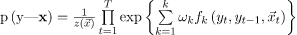